# Test FRED API

In [1]:
import os
os.environ['FRED_API_KEY'] = '6fba36c239bdc526cd2cbf653fbf70bd'
import pyfredapi as pf
master_categories = pf.get_category_children(category_id=0)

In [ ]:
import copy
import time

for category in master_categories['categories']:
    print(f"Looking through category: {category['name']}")
    seen_categories = set()
    leaf_categories = []
    child_categories = copy.deepcopy(pf.get_category_children(category_id=category['id'])['categories'])
    while len(child_categories) > 0:
        time.sleep(0.7)
        current_category = child_categories.pop()
        if current_category['id'] in seen_categories:
            continue
        seen_categories.add(current_category['id'])
        print(f"Looking through child category: {current_category['name']}")
        current_category_children = copy.deepcopy(pf.get_category_children(category_id=current_category['id'])['categories'])
        if len(current_category_children) == 0:
            leaf_categories.append(current_category)
        else:
            child_categories.extend(current_category_children)
    print(leaf_categories)

In [30]:
import json
import copy
import time
from tqdm import tqdm

cur_series = set()
with open('data/fred_categories/banking.json', 'r') as f:
    data = json.load(f)
    pbar = tqdm(data)
    for category in pbar:
        time.sleep(0.55)
        current_series = copy.deepcopy(pf.get_category_series(category_id=category['id']))
        filtered_series = [
            series_info.id
            for series_info in current_series.values()
            if series_info.popularity >= 20 and series_info.frequency_short == 'M' and int(series_info.observation_start[:4]) <= 1970
        ]
        cur_series.update(filtered_series)
print(list(cur_series))

100%|██████████| 161/161 [02:12<00:00,  1.21it/s]

['M1REAL', 'M2MSL', 'TB1YR', 'DEMDEPSL', 'CONSUMER', 'RESBALNS', 'GS3', 'AAA', 'T10YFFM', 'CURRNS', 'EXCRESNS', 'MBCURRCIR', 'STDSL', 'BUSLOANS', 'M2SL', 'FLTOTALSL', 'USGSEC', 'M2NS', 'GS20', 'BOGMBASE', 'LOANINV', 'DISCBORR', 'BAA', 'CFNAI', 'TOTALSL', 'TOTALSLAR', 'CURRSL', 'TCDSL', 'TVCKSSL', 'GS5', 'MPRIME', 'CFNAIDIFF', 'BAAFFM', 'TB6SMFFM', 'M1NS', 'CURRDD', 'IRA', 'REVOLSLAR', 'REQRESNS', 'CFNAIMA3', 'TOTRESNS', 'M2OWN', 'BOGMBBM', 'GS1', 'BAA10YM', 'M1SL', 'TB6MS', 'CURRCIR', 'AAA10YM', 'LOANS', 'M2REAL', 'BORROW', 'REVOLSL', 'M3SL', 'TB3MS', 'NONBORRES', 'TB3SMFFM', 'SNBMONTBASE', 'NONREVSL', 'AMBSL', 'FEDFUNDS', 'GS10', 'REALLN']


In [52]:
banking_series = ['M1REAL', 'M2MSL', 'DEMDEPSL', 'CONSUMER', 'GS3', 'AAA', 'T10YFFM', 'CURRNS', 'MBCURRCIR', 'STDSL', 'BUSLOANS', 'M2SL', 'FLTOTALSL', 'USGSEC', 'M2NS', 'BOGMBASE', 'LOANINV', 'BAA', 'CFNAI', 'TOTALSL', 'TOTALSLAR', 'CURRSL', 'GS5', 'MPRIME', 'CFNAIDIFF', 'BAAFFM', 'TB6SMFFM', 'M1NS', 'CURRDD', 'IRA', 'REVOLSLAR', 'CFNAIMA3', 'TOTRESNS', 'BOGMBBM', 'GS1', 'BAA10YM', 'M1SL', 'TB6MS', 'CURRCIR', 'AAA10YM', 'LOANS', 'M2REAL', 'BORROW', 'REVOLSL', 'M3SL', 'TB3MS', 'NONBORRES', 'TB3SMFFM', 'SNBMONTBASE', 'NONREVSL', 'FEDFUNDS', 'GS10', 'REALLN']
labor_series = ['USGOVT', 'CES9091000001', 'MANEMP', 'LNS11300002', 'EMRATIO', 'AWHNONAG', 'CEU3000000001', 'USLAH', 'USGOOD', 'CES2000000008', 'USPRIV', 'LNS11300003', 'PAYEMS', 'USTRADE', 'LNS14000024', 'USWTRADE', 'CEU0500000008', 'LNU01300000', 'CLF16OV', 'USMINE', 'LNU01000000', 'USPBS', 'CES0500000006', 'USCONS', 'LNS11324230', 'AWOTMAN', 'LNS12300012', 'LNS11000060', 'CEU3100000008', 'LNS13023653', 'UNRATE', 'CES0500000030', 'LNS11300060', 'LNS13000001', 'USSERV', 'FEDMINFRMWG', 'LNS14000028', 'LNS14000002', 'LNU01300060', 'LNS11300012', 'LNU01300002', 'AWHI', 'USEHS', 'SRVPRD', 'USFIRE', 'AHETPI', 'LNS11300001', 'LNS14000001', 'LNS12300060', 'LNS14024887', 'CES3000000008', 'UNEMPLOY', 'CIVPART', 'USTPU', 'LNS11300029', 'UEMPMEAN', 'UNRATENSA', 'LNS13000002', 'LNS12300002', 'CE16OV', 'CES9093000001', 'LNU03000000', 'LNS11300028', 'LNU01300001', 'CES9092000001', 'USINFO', 'AWHMAN', 'LNS12300001', 'LNS11300036', 'PAYNSA', 'FEDMINNFRWG']
nat_accnt_series = ['MVMTD027MNFRBDAL', 'DPCERAM1M225NBEA', 'DDURRG3M086SBEA', 'DGDSRG3M086SBEA', 'DFXARC1M027SBEA', 'PQ001260M', 'DPCERA3M086SBEA', 'DPCCRAM1M225NBEA', 'DPCCRC1M027SBEA', 'MVGFD027MNFRBDAL', 'DNRGRC1M027SBEA']
prod_series = ['HOUST1F', 'HTRUCKSSA', 'HOUST2F', 'UNDCON5MUSA', 'HOUST5F', 'UNDCON1USA', 'HSN1F', 'HSN1FNSA', 'DAUTOSA', 'EUROREC', 'SHTSAUS', 'COMPUTNSA', 'USRECM', 'MSACSR', 'UNDCONTSA', 'HTRUCKSNSA', 'HNFSEPUSSA', 'HTRUCKSSAAR', 'MSPNHSUS', 'CMRMTSPL', 'PERMITNSA', 'PERMIT', 'COMPU5MUSA', 'HOUST1FNSA', 'HOUST', 'COMPUTSA', 'PERMIT5', 'UNDCONTNSA', 'PERMIT1', 'USREC', 'DAUTOSAAR', 'MSACSRNSA', 'COMPU1USA', 'AUTHNOTT', 'HOUSTNSA']
price_series = ['CPIFABSL', 'WPUSI019011', 'WPSFD4111', 'WPU0622', 'WPU01130216', 'CUUR0000SEHA', 'WPU1321', 'CUSR0000SAH1', 'WPU03', 'CRESTKCPIXSLTRM159SFRBATL', 'CPIUFDNS', 'WPUSI012011', 'WPU071102', 'WPU01', 'CPIUFDSL', 'COREFLEXCPIM679SFRBATL', 'WPU1141', 'CUUR0000SEFJ', 'PCU482111482111', 'WPU111', 'CUSR0000SAS', 'WPU11', 'WPU07', 'WPU0811', 'WPSFD49207', 'WPU102', 'CUSR0000SETB01', 'CUUR0000SETB01', 'CPIHOSSL', 'WPU122', 'CUUR0000SEAE', 'STICKCPIXSHLTRM159SFRBATL', 'CUSR0000SETA01', 'PPIIDC', 'WPU071', 'WPU102501', 'WPU1012', 'CUUR0000SETA01', 'CUUR0000SAS4', 'WPS101', 'PCU22112222112243', 'CORESTICKM158SFRBATL', 'WPU0913', 'WPU012', 'CUSR0000SASLE', 'CUSR0000SEHE', 'WPU0812', 'CUUR0000SAM2', 'CPIAPPSL', 'WPU0121', 'WPU137', 'CUSR0000SACL1E', 'CUUR0000SA0R', 'WPU06', 'CUUR0000SA0L2', 'PCU311421311421', 'CUUR0000SASLE', 'WPU066', 'WPU0278', 'CUUR0000SAH1', 'CPIENGSL', 'WPUID62', 'CORESTICKM157SFRBATL', 'CUSR0000SAF112', 'WPU065202', 'CUSR0000SAF116', 'WPU1191', 'CUSR0000SA0L2', 'CUUR0000SAF11', 'WPU114', 'CORESTICKM159SFRBATL', 'COREFLEXCPIM159SFRBATL', 'WPU061', 'WPU0922', 'WPS061', 'CUSR0000SAC', 'CUSR0000SAD', 'WPSFD41312', 'WPU1178', 'CUSR0000SAM1', 'WPU1311', 'WPU081', 'CPILFESL', 'CWUR0000SA0R', 'WPU1411', 'WPU0711', 'WPU083', 'CUSR0000SETD', 'WPU1017', 'CUSR0000SAH3', 'WPU117', 'PCU212321212321', 'WPU10', 'WPU08', 'WPU0571', 'CUSR0000SAN', 'CUSR0000SAF11', 'CUSR0000SEHF01', 'WPU0561', 'CPIHOSNS', 'CUUR0000SETA02', 'WPU0531', 'WPU0221', 'WPU011', 'WPU03T15M05', 'WPU101', 'CPIENGNS', 'WPU102502', 'WPU09', 'WPS081', 'CPIMEDSL', 'CUSR0000SEHF', 'CPILFENS', 'WPUFD49207', 'WPU091301', 'CPIOGSSL', 'CPITRNSL', 'CORESTICKM679SFRBATL', 'WPU071201', 'WPU13', 'CUSR0000SETA02', 'CUUR0000SEFV', 'CRESTKCPIXSLTRM679SFRBATL', 'WPUID61', 'WPU1392', 'WPU029', 'WPU026301', 'CUSR0000SEFV', 'WPU0911', 'WPU112', 'CUSR0000SAM2', 'WPU1173', 'PPIENG', 'CUSR0000SAF113', 'CUSR0000SEHF02']
academic_series = ['SAHMCURRENT', 'MBM0UKM', 'LIOR3MUKM', 'M0264AUSM500NNBR', 'M11007USM322NNBR', 'M1490AUSM157SNBR', 'M0263AUSM500NNBR', 'M08343USM232SNBR', 'USUKFXUKM', 'M04128USM350NNBR', 'M1109BUSM293NNBR', 'M14047USM156NNBR', 'M08297USM548NNBR', 'M0929BUSM155NNBR', 'M16072USM351SNBR', 'M1125AUSM343NNBR', 'M0892AUSM156SNBR', 'M09086USM156NNBR', 'BOERUKM', 'M04220USM156NNBR', 'CHNMAINLANDEPU', 'RGDPMRPUKM', 'M08354USM310NNBR', 'AURUKM', 'M0848BGBM352SNBR', 'M1329AUSM193NNBR', 'M13050USM156NNBR', 'M1346BUSM156NNBR', 'SAHMREALTIME', 'M09075USM476NNBR', 'IPIUKM', 'RECPROUSM156N', 'M14060USM156NNBR', 'M10092USM144NNBR', 'M14062USM027NNBR']

print(f"Banking Series Count: {len(banking_series)}")
print(f"Labor Series Count: {len(labor_series)}")
print(f"National Accounts Series Count: {len(nat_accnt_series)}")
print(f"Production Series Count: {len(prod_series)}")
print(f"Price Series Count: {len(price_series)}")
print(f"Academic Series Count: {len(academic_series)}")

Banking Series Count: 53
Labor Series Count: 71
National Accounts Series Count: 11
Production Series Count: 35
Price Series Count: 135
Academic Series Count: 35


In [53]:
import time
import pandas as pd

big_df = None
all_collections = [banking_series, labor_series, nat_accnt_series, prod_series, price_series, academic_series]
for series_list in all_collections:
    cur_collection = pf.SeriesCollection(series_id=[])
    for series in series_list:
        time.sleep(0.55)
        cur_collection.add(series)
    cur_df = cur_collection.merge_wide()
    cur_df["date"] = pd.to_datetime(cur_df["date"])
    cur_df = cur_df.loc[(cur_df['date'] >= '1970-01-01') & (cur_df['date'] <= '2022-07-01')]
    cur_df = cur_df.set_index("date")
    cur_df = cur_df.sort_index()
    if big_df is None:
        big_df = cur_df
    else:
        big_df = big_df.join(cur_df)

Requesting series M1REAL...
Requesting series M2MSL...
Requesting series DEMDEPSL...
Requesting series CONSUMER...
Requesting series GS3...
Requesting series AAA...
Requesting series T10YFFM...
Requesting series CURRNS...
Requesting series MBCURRCIR...
Requesting series STDSL...
Requesting series BUSLOANS...
Requesting series M2SL...
Requesting series FLTOTALSL...
Requesting series USGSEC...
Requesting series M2NS...
Requesting series BOGMBASE...
Requesting series LOANINV...
Requesting series BAA...
Requesting series CFNAI...
Requesting series TOTALSL...
Requesting series TOTALSLAR...
Requesting series CURRSL...
Requesting series GS5...
Requesting series MPRIME...
Requesting series CFNAIDIFF...
Requesting series BAAFFM...
Requesting series TB6SMFFM...
Requesting series M1NS...
Requesting series CURRDD...
Requesting series IRA...
Requesting series REVOLSLAR...
Requesting series CFNAIMA3...
Requesting series TOTRESNS...
Requesting series BOGMBBM...
Requesting series GS1...
Requesting ser

In [56]:
print(big_df.shape)
print(big_df.dropna(1).shape)
big_df = big_df.dropna(axis=1)
big_df.shape

(631, 340)
(631, 304)


/tmp/ipykernel_1737070/2159827185.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  print(big_df.dropna(1).shape)


(631, 304)

In [57]:
big_df.to_csv('data/fred_new_data.csv')

# Load data and compute memory:

In [2]:
import pandas as pd
from learning.memory import run_memory

# load data
data = pd.read_csv('data/inputs/fredmd_transf.csv')
#data = pd.read_csv('data/fred_new_data.csv')

# fix dates
data["date"] = pd.to_datetime(data["date"])
data = data.set_index("date")

# fill missing values
data = data.interpolate(method='linear', limit_direction='forward', axis=0)
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')

# normalize data
# data = (data - data.mean()) / data.std()

print(f"Original data shape: {data.shape}")

# compute moving average
data = data.rolling(window=12).mean()

# drop missing values
data = data.dropna()
print(f"Shape after dropping NA values: {data.shape}")

memory, all_centroids, all_probs = run_memory(
    data=data,
    fix_start=True,
    estimation_window=12 * 4,
    k_opt_method="elbow",
    clustering_method="kmeans"
)
memory

Original data shape: (757, 127)
Shape after dropping NA values: (746, 127)


Building memory using window: 698: : 699it [00:50, 13.77it/s]                       


,cluster_step0,cluster_step1,cluster_step2,cluster_step3,cluster_step4,cluster_step5,cluster_step6,cluster_step7,cluster_step8,cluster_step9,...,cluster_step689,cluster_step690,cluster_step691,cluster_step692,cluster_step693,cluster_step694,cluster_step695,cluster_step696,cluster_step697,cluster_step698
date,,,,,,,,,,,,,,,,,,,,,
1960-12-01,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4
1961-01-01,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1961-02-01,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1961-03-01,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1961-04-01,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4
2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0
2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0


In [3]:
# here we get the final clusters, probabilities and centroids
final_clusters = memory[f"cluster_step{len(all_probs) - 1}"]
final_probs = all_probs[-1]
final_centroids = all_centroids[-1]

In [7]:
# a block to check if the probabilities are consistent
test_segment = 500
test_month = 170

print(all_probs[test_segment].shape)
print(all_probs[test_segment][test_month])
print(memory[f"cluster_step{test_segment}"][test_month])

(548, 6)
[0.29664712 0.13796431 0.13696079 0.14841263 0.14185197 0.13816317]
0.0


# Visualize clusters over time:

<Figure size 640x480 with 0 Axes>

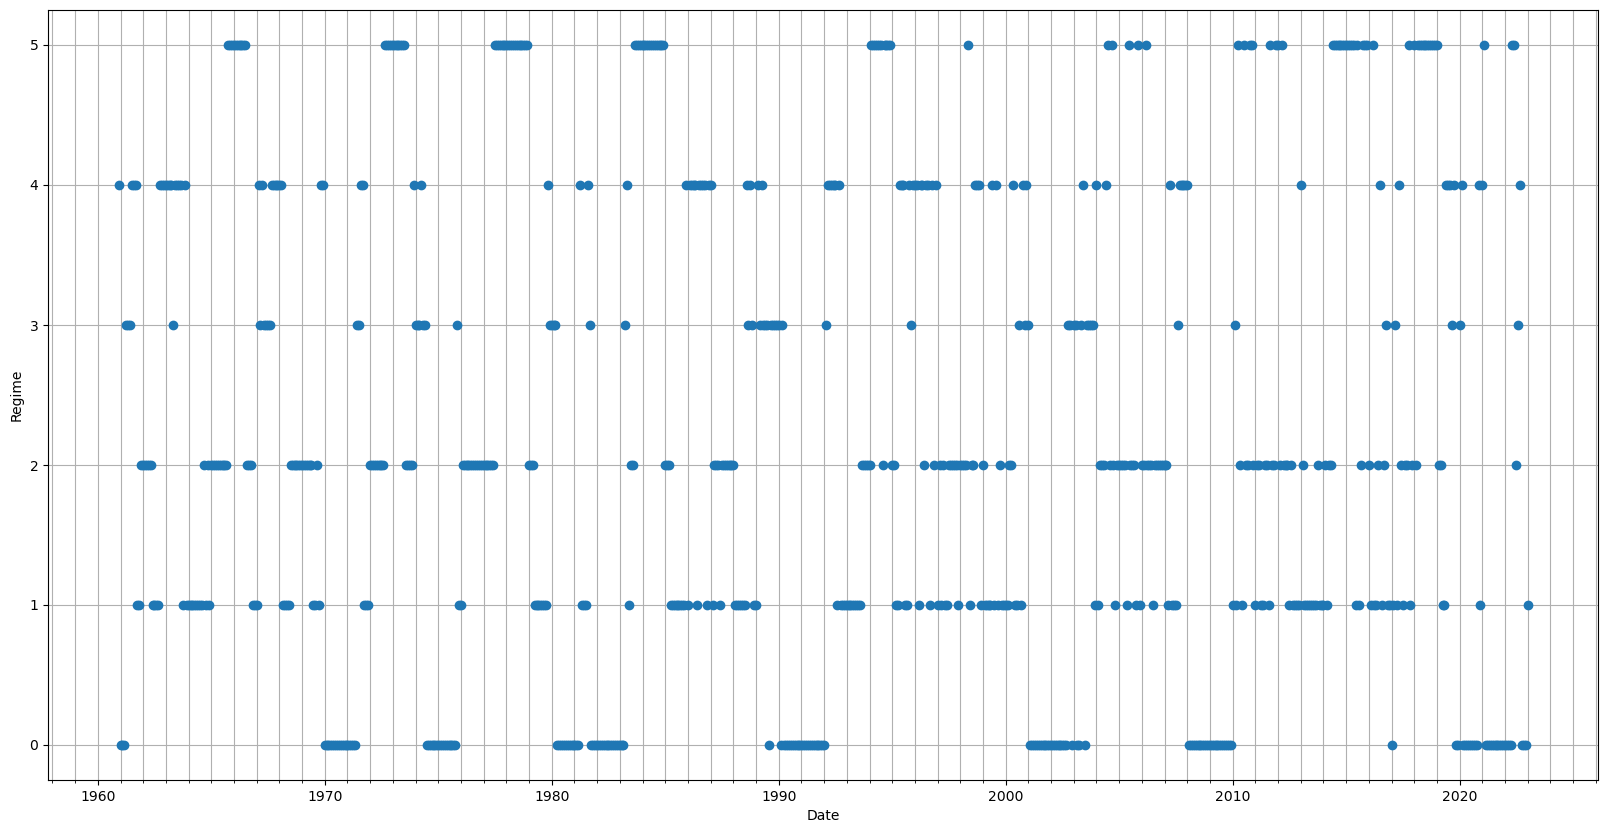

In [8]:
#shown_step = 100
#shown_clusters = memory[f"cluster_step{shown_step}"]
shown_clusters = final_clusters

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
plt.figure(figsize=(20, 10))
plt.plot(shown_clusters.index, shown_clusters.values, marker="o", linestyle="")
ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.YearLocator())
plt.xlabel("Date")
plt.ylabel("Regime")
plt.grid(which="both")

<Figure size 640x480 with 0 Axes>

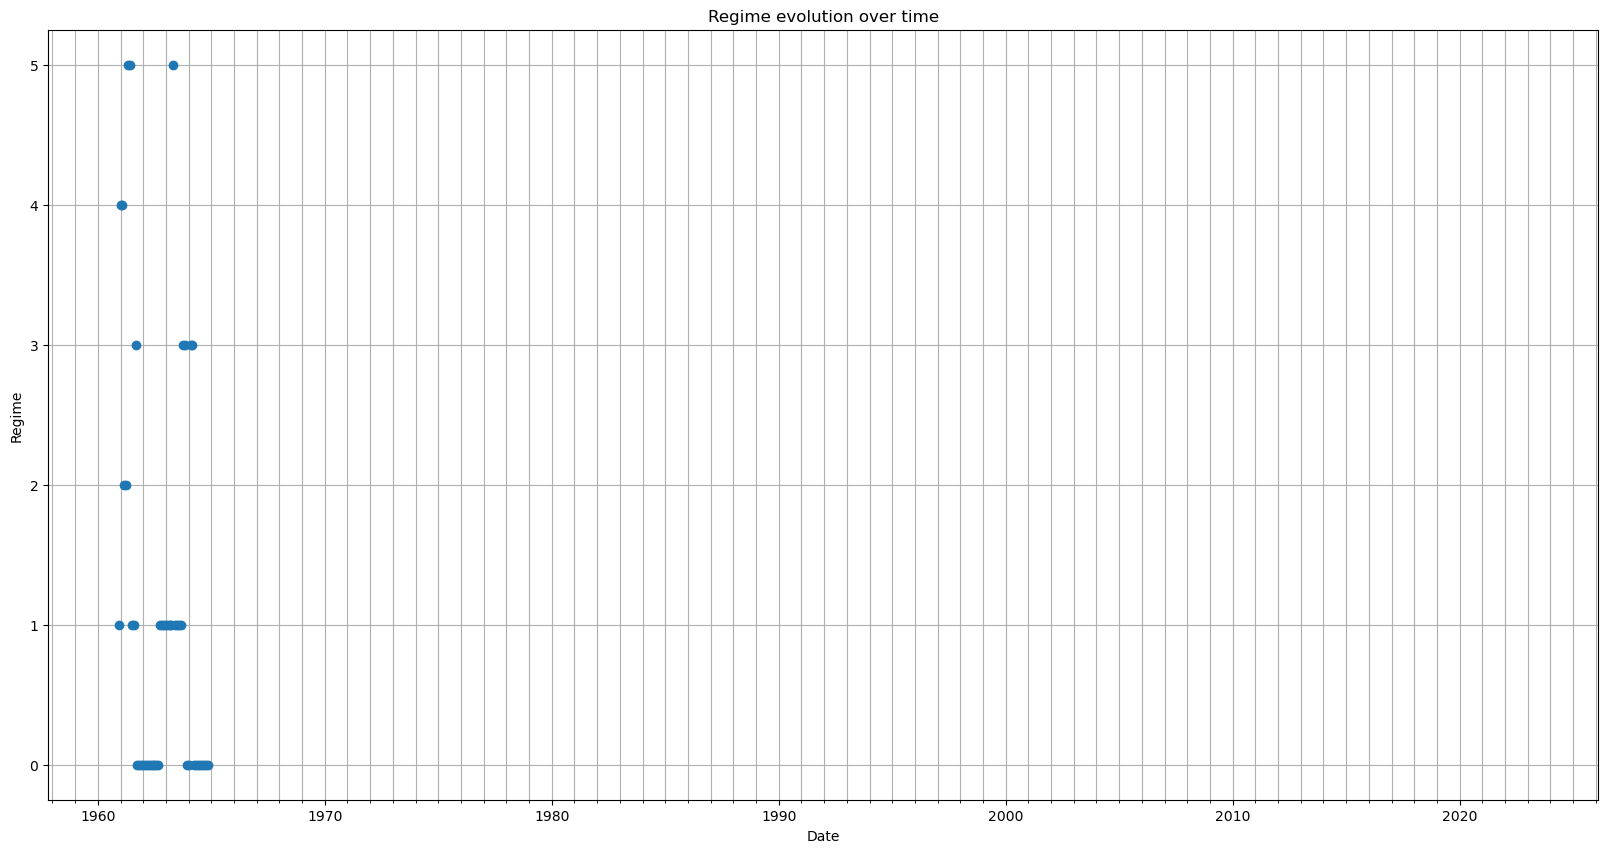

In [51]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

shown_clusters = memory[f"cluster_step{len(all_probs) - 1}"]
plt.clf()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plot = ax.plot(shown_clusters.index, shown_clusters.values, marker="o", linestyle="")[0]
ax.xaxis.set_minor_locator(mdates.YearLocator())
ax.set(xlabel="Date", ylabel="Regime", title="Regime evolution over time")
plt.grid(which="both")

def update(frame):
    shown_clusters = memory[f"cluster_step{frame}"]
    plot.set_xdata(shown_clusters.index)
    plot.set_ydata(shown_clusters.values)
    return plot
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(all_probs) - 1, interval=1)
ani.save(filename="regime_evolution.gif", writer="pillow")

# View statistics of each cluster:

In [10]:
import numpy as np

raw_data = pd.read_csv('data/inputs/fredmd_transf.csv')
raw_data["date"] = pd.to_datetime(raw_data["date"])
raw_data = raw_data.set_index("date")
raw_data = raw_data.interpolate(method='linear', limit_direction='forward', axis=0)
raw_data = raw_data.fillna(method='ffill')
raw_data = raw_data.fillna(method='bfill')
raw_data = raw_data.dropna()

major_cols = ['RPI', 'UNRATE', 'UMCSENTx', 'FEDFUNDS', 'CPIAUCSL', 'S&P 500']

full_stats = []
for i in range(final_probs.shape[1]):
    cur_cluster = final_clusters[final_clusters == i]
    fred_data = raw_data.loc[cur_cluster.index]
    print(f"Cluster {i} Statistics:")
    # get average of each column
    full_stats.append([])
    for col in major_cols:
        print(f"    {col}: {fred_data[col].mean()}")
        full_stats[-1].append(fred_data[col].mean())
    full_stats[-1] = np.array(full_stats[-1])
full_stats = np.array(full_stats)

Cluster 0 Statistics:
    RPI: 0.0010194062117331614
    UNRATE: 0.11393939393939394
    UMCSENTx: -0.12545454545454682
    FEDFUNDS: -0.1983030303030303
    CPIAUCSL: 0.003510844695441352
    S&P 500: 0.0035969636789731645
Cluster 1 Statistics:
    RPI: 0.0031552089455553407
    UNRATE: -0.0372549019607843
    UMCSENTx: 0.33398692810457403
    FEDFUNDS: 0.07816993464052285
    CPIAUCSL: 0.002744698009971841
    S&P 500: 0.01182183531177726
Cluster 2 Statistics:
    RPI: 0.0034775691656992362
    UNRATE: -0.057317073170731724
    UMCSENTx: 0.22621951219512018
    FEDFUNDS: 0.06042682926829266
    CPIAUCSL: 0.003044408115977384
    S&P 500: 0.003397101407076105
Cluster 3 Statistics:
    RPI: 0.001838302947858896
    UNRATE: 0.012499999999999971
    UMCSENTx: 0.12499999999999797
    FEDFUNDS: 0.022499999999999992
    CPIAUCSL: 0.004226785336607479
    S&P 500: 0.005003932028095874
Cluster 4 Statistics:
    RPI: 0.002722203533667738
    UNRATE: -4.625929269271485e-18
    UMCSENTx: 0.16041

<Figure size 640x480 with 0 Axes>

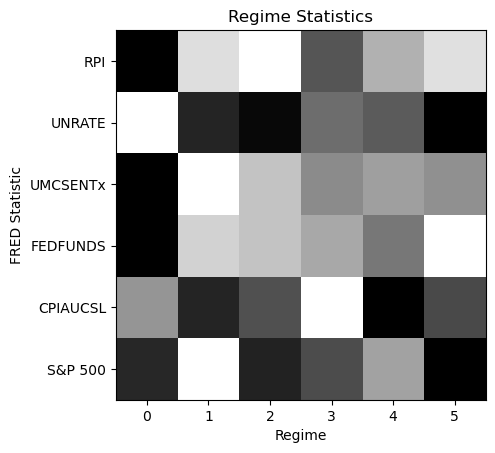

In [11]:
full_stats_plot = full_stats.copy().T
full_stats_plot = full_stats_plot - full_stats_plot.min(axis=1, keepdims=True)
full_stats_plot = full_stats_plot / full_stats_plot.max(axis=1, keepdims=True)

import matplotlib.pyplot as plt
plt.clf()
fig, ax = plt.subplots()
ax.imshow(full_stats_plot, cmap='gray', interpolation='nearest')
ax.set_yticks(np.arange(len(major_cols)))
ax.set_yticklabels(major_cols)
ax.set(xlabel="Regime", ylabel="FRED Statistic", title="Regime Statistics")
fig.show()

# Compute and analyze transition matrix:

In [12]:
from learning.memory import compute_transition_matrix
transition_test = compute_transition_matrix(memory)
print(transition_test[-1])

[[0.89090909 0.01818182 0.         0.07272727 0.01212121 0.00606061]
 [0.00657895 0.51973684 0.23026316 0.02631579 0.17105263 0.04605263]
 [0.         0.20121951 0.6402439  0.01219512 0.04268293 0.10365854]
 [0.16071429 0.125      0.         0.41071429 0.30357143 0.        ]
 [0.07291667 0.26041667 0.04166667 0.15625    0.44791667 0.02083333]
 [0.00892857 0.05357143 0.17857143 0.         0.         0.75892857]]


<Figure size 640x480 with 0 Axes>

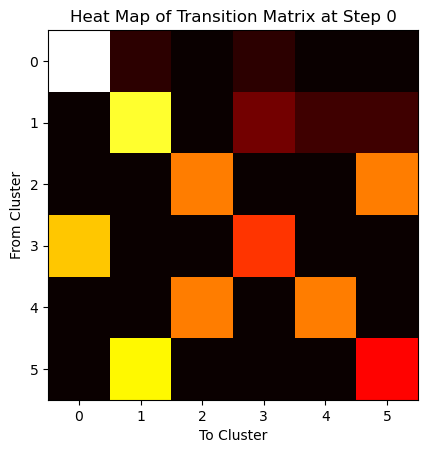

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.clf()
fig, ax = plt.subplots()
im = ax.imshow(transition_test[0], cmap='hot', interpolation='nearest')
def update(frame):
    im.set_data(transition_test[frame])
    ax.set_title(f'Heat Map of Transition Matrix at Step {frame}')
    ax.set_xlabel('To Cluster')
    ax.set_ylabel('From Cluster')
    return im
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(transition_test), interval=1)
ani.save(filename="cluster_transition_evolution.gif", writer="pillow")

# Do predictions of future clusters:

[[18.56092709 17.30700698 14.91704989 16.54753313 20.20479214 12.46269077]]

[[18.37466652 17.0175315  15.38912087 18.07628788 18.37723233 13.21493467]]

[[18.29705107 16.73681987 15.65172758 18.08325518 17.7438814  13.85296178]]

[[18.21949548 16.57211155 15.80256391 17.84628664 17.40675433 14.36834173]]

[[18.12920885 16.4805605  15.90213753 17.61356529 17.18719721 14.77689723]]

[[18.02999671 16.43044718 15.97760793 17.42537781 17.03472686 15.09903203]]

[[17.92711441 16.40492918 16.04043279 17.27959191 16.92659973 15.35341572]]

[[17.82462014 16.39483907 16.09549729 17.16716684 16.84915896 15.55540787]]

[[17.72523276 16.39469715 16.14498344 17.0797499  16.79330688 15.71708276]]

[[17.63063032 16.40095583 16.18994709 17.01090071 16.7527771  15.84772428]]

[[17.54175522 16.41121162 16.23096671 16.95589805 16.72319241 15.9543917 ]]

[[17.45904973 16.42380687 16.2684164  16.91132508 16.70146845 16.04242548]]

[[17.38262421 16.43759754 16.30258239 16.874706   16.68541725 16.11586058]]


<Figure size 640x480 with 0 Axes>

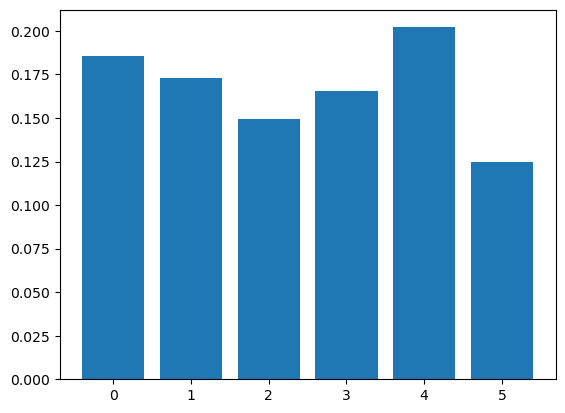

In [14]:
import numpy as np

# probability distribution prediction over time
horizon = 36
starting_month = 300

starting_dist = final_probs[starting_month]
transition_mat = transition_test[-1]
dists = []
cur_dist = np.array(starting_dist).reshape(-1, 1)
dists.append(cur_dist.copy())
print(cur_dist.T * 100)
print('')
for i in range(horizon):
    cur_dist = np.matmul(transition_mat, cur_dist)
    dists.append(cur_dist.copy())
    print(cur_dist.T * 100)
    print('')

import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.clf()
fig, ax = plt.subplots()
x = list(range(6))
im = ax.bar(x, dists[0].reshape(-1))
def update(frame):
    for i, b in enumerate(im):
        b.set_height(dists[frame].reshape(-1)[i])
    return im
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(dists), interval=1)
ani.save(filename="prob_dist_evolution.gif", writer="pillow")